### Galton의 데이터를 사용한 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab.files import upload
from sklearn.linear_model import LinearRegression
%matplotlib inline

#### 1. 데이터를 읽어 들여서 시각화 해보기.

In [2]:
# df = pd.read_csv('./data/data_galton.csv', header='infer').  # 로컬 파일 읽어오기.

In [3]:
dict_data = upload()                                          # Colab으로 파일 올리기.
df = pd.read_csv(io.BytesIO(dict_data['data_galton.csv']))    # Colab으로 올린 파일 읽어오기.

Saving data_galton.csv to data_galton.csv


In [4]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [5]:
df.shape

(928, 2)

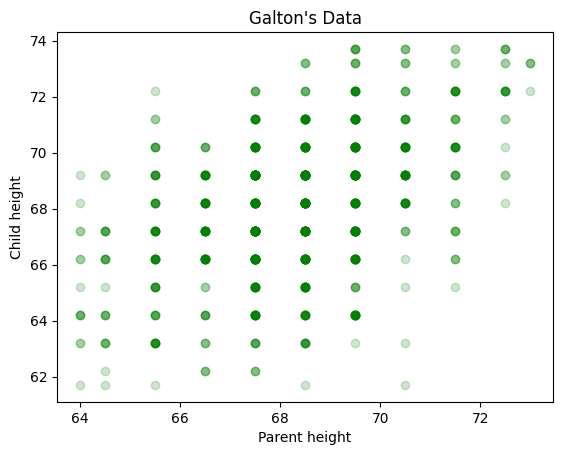

In [6]:
plt.scatter(df.parent, df.child , c='green', alpha=0.2)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

In [7]:
# 겹치는 값들이 많다.
# 분할표로 요약해 본다.
myTable = pd.crosstab(df.parent, df.child)
myTable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [8]:
# 분할표를 바탕으로 산점도를 그릴 수 있도록 준비해 둔다. 
# 점의 크기 = 도수.
childHeights = list(myTable.columns)
parentHeights = list(myTable.index)
combo = [ (x, y, myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])
combo

,x,y,freq
0,64.0,61.7,1
1,64.0,62.2,0
2,64.0,63.2,2
3,64.0,64.2,4
4,64.0,65.2,1
...,...,...,...
149,73.0,70.2,0
150,73.0,71.2,0
151,73.0,72.2,1
152,73.0,73.2,3


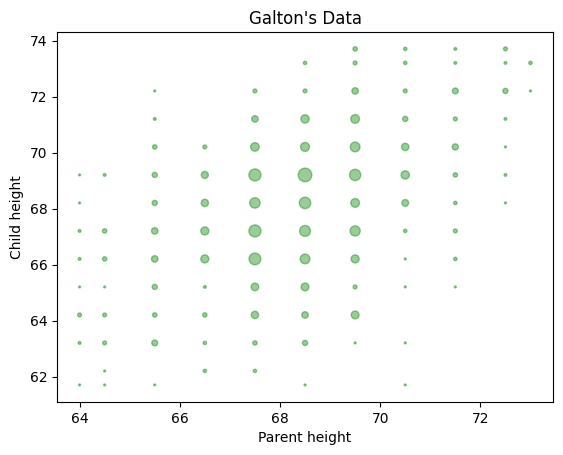

In [9]:
# 산점도 출력.
plt.scatter(combo.x, combo.y , s = combo.freq*2,  c='green',alpha=0.4)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

#### 2. 선형회귀 학습 진행.

In [10]:
# 선형회귀 객체 생성.
lm = LinearRegression(fit_intercept=True)

In [11]:
# 학습 진행.
lm.fit(df[['parent']],df[['child']])

LinearRegression()

In [12]:
# 절편 추력.
lm.intercept_

array([23.94153018])

In [13]:
# 회귀 계수 출력.
lm.coef_

array([[0.64629058]])

#### 3. 회귀선 출력.

In [14]:
# 예측된 Y.
predY = lm.predict(df[['parent']])

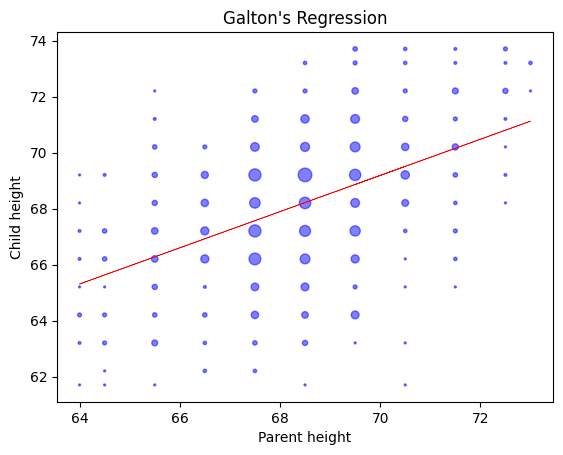

In [15]:
# 산점도 + 회귀선 출력.
plt.plot(df.parent, predY, c = 'red',linestyle='-',linewidth=0.5)

plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()